> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDB movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

### Dataset Description 

Contains information about 10,000 movies collected from The Movie Database (From 1960 to 2015)



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html



## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# import csv file
df = pd.read_csv('tmdb-movies.csv')
# display summary of dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Cleaning

In [3]:
# Replace each null value in data frome to "info not available"
df.fillna("info not available", inplace = True)

# Check all null values no longer exist
df.isnull().sum()


id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [4]:
#delete duplicate rows
df.drop_duplicates(inplace=True)

#check no more duplicate rows exist
df.duplicated().sum()

0

In [5]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2004-01-15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,info not available,Bruce Brown,info not available,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,info not available,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,info not available,Eldar Ryazanov,info not available,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,info not available,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


## Research Question 1: How does the distribution of ratings look like?

## Exploratory Data Analysis

In [6]:
# Convert voting_average from float to int(add new column)
df['vote'] = df['vote_average'].astype(int)

# summarize number of votes by ratings

vote = df['vote'].value_counts()



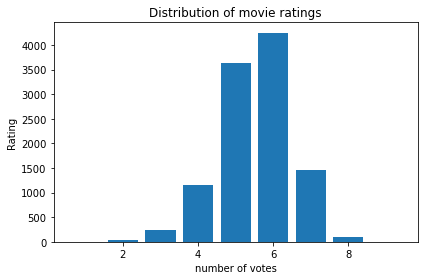

In [7]:
#plot histogram

plt.bar(vote.index, vote.values)

plt.plot

plt.title("Distribution of movie ratings")

plt.xlabel("number of votes")

plt.ylabel("Rating")

plt.tight_layout()

plt.show()

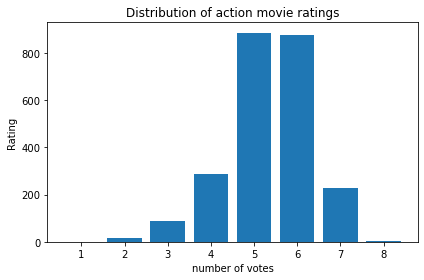

In [8]:
# filter to show only votes for movies with drama as genres

action = df[df['genres'].str.contains('Action', na=False)]

action1 = action['vote'].value_counts()

def plot_hist(subset_movie, movie_title, x_axis, y_axis):
    
    plt.bar(subset_movie.index, subset_movie.values)

    plt.plot

    plt.title(movie_title)

    plt.xlabel(x_axis)

    plt.ylabel(y_axis)

    plt.tight_layout()

    plt.show()
    
# plot histogram

plot_hist(action1,'Distribution of action movie ratings','number of votes','Rating')





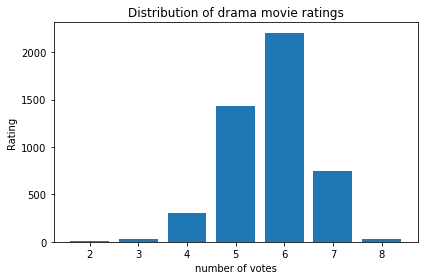

In [9]:
# filter to show only votes for movies with drama as genres

drama = df[df['genres'].str.contains('Drama', na=False)]

drama1 = drama['vote'].value_counts()


# plot histogram

plot_hist(drama1,'Distribution of drama movie ratings','number of votes','Rating')



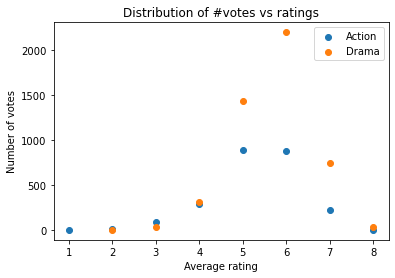

In [10]:
# plot scatter graph

plt.scatter(action1.index, action1.values)
plt.scatter(drama1.index, drama1.values)

plt.xlabel('Average rating')
plt.ylabel('Number of votes')
plt.title('Distribution of #votes vs ratings')
plt.legend(['Action','Drama'])
plt.show()


## Research Question 2: For action and drama movies, was there a correlation between    ratings of movies and gross revenues?  

## Exploratory Data Analysis


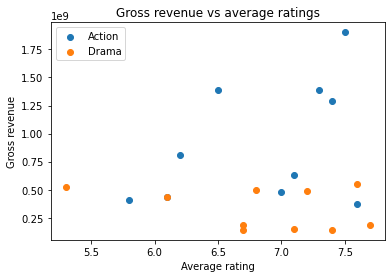

In [11]:
df = pd.read_csv('tmdb-movies.csv')
df2 = pd.read_csv('tmdb-movies.csv')


# Replace each null value in data frome to 0
df.fillna(0, inplace = True)
df2.fillna(0, inplace = True)

# delete duplicate rows
df.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

# create database to show movies with 'Action' as one of the genres and released in 2015
df = df[df['release_year'] == 2015]
df = df[df['genres'].str.contains('Action', na=False)]

# Show top 10 action movies by revenue
df.sort_values(by='revenue_adj', inplace=True, ascending=False)
df = df.nlargest(10,'revenue_adj')

# create database to show movies with 'Drama' as one of the genres and released in 2015
df2 = df2[df2['release_year'] == 2015]
df2 = df2[df2['genres'].str.contains('Drama', na=False)]

# Show top 10 drama movies by revenue
df2.sort_values(by='revenue_adj', inplace=True, ascending=False)
df2 = df2.nlargest(10,'revenue_adj')

# plot scatter graph

plt.scatter(df['vote_average'], df['revenue_adj'])
plt.scatter(df2['vote_average'], df2['revenue_adj'])

plt.xlabel('Average rating')
plt.ylabel('Gross revenue')
plt.title('Gross revenue vs average ratings')
plt.legend(['Action','Drama'])
plt.show()

# Conclusion

## Steps taken

For question one, 3 subset was created:  all movies, action movies and drama movies.  Using the value_function I tallied up
each rating by number of votes.  A bar chart was created for each subset.  

For question two, Replaced NAN values with 0.  Eliminated duplicate row(s).  Filtered dataframe to show only movies with 'action' 
as the genre and was released in 2015.  Sort and filter the top 10 movies in terms of revenue. Repeated the same 
steps for drama movies.  Plotted a scatter graph with ratings as x-axis and revenue as y-axis. 

## Findings

For question one, I created 3 graphs which were distribution of ratings for all movies in the database, distribution
of ratings for actions moves and distribution ratings for drama movies.  Turns out all three graphs exhibited a somewhat 
normal distribution.

For question two, Relationship between revenues and movie ratings was studied specifically for movies released in 2015. 
The graph shows that higher ratings translates to high revenues.  The same can't be said for drama movies where the 
data points were flat.  Also, action movies were the more popular genre.

## Additional info

For question one, voting by country would have been interesting.  We could have analyzed the response of ratings by geo
location.  Due to difference in culture, ratings could be drastically different depending on location and indicative of 
difference in movie preferences between countries.

For question two, It would have been more insightful if the database provided the percentage of movie goers who voted.  lower percentage
would mean sample size were not large enough to be included as part of the database.

## Limitations

For question one, the assignment required at least one single variable analyses.  I found that not much insight can 
provided when analyzing a database using only one variable other than distribution of datapoints.

For question two, I was unable to include all datapoints cause it would have made the scatterplot too messy and impossible 
to analyze therefore I had to filter the dataset by genre and year. I felt I was dealing with too much data.

from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])